In [2]:
import os
import numpy as np
import scipy.io
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from kymatio.numpy import Scattering1D
from scipy import signal

In [3]:
# --- Paths ---
data_dir = 'training2017/training2017'
label_df = pd.read_csv("training2017/training2017/REFERENCE.csv", header=None, names=['filename', 'label'])
label_map = dict(zip(label_df['filename'], label_df['label']))

In [4]:
# --- Load & Process All Files ---
features, labels = [], []
file_list = sorted([f for f in os.listdir(data_dir) if f.endswith('.mat')])
samples_to_remove = 600

Min length: 1514
Max length: 17086
Mean length: 8549.24
Median length: 7800.00
Standard deviation: 3266.64


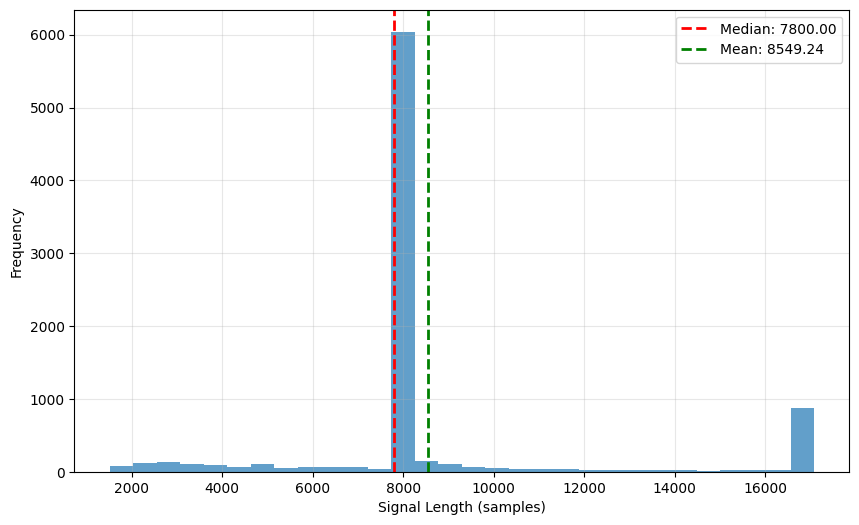

In [5]:
# Analyze ECG signal lengths
signal_lengths = []
for file in file_list:
    try:
        mat_path = os.path.join(data_dir, file)
        mat_contents = scipy.io.loadmat(mat_path)
        ecg = mat_contents['val'].squeeze()
        # Apply trimming as in your pipeline
        trimmed = ecg[samples_to_remove:-samples_to_remove]
        signal_lengths.append(len(trimmed))
    except Exception as e:
        print(f"Error getting length for {file}: {e}")

# Convert to numpy array for analysis
signal_lengths = np.array(signal_lengths)

# Print statistics
print(f"Min length: {signal_lengths.min()}")
print(f"Max length: {signal_lengths.max()}")
print(f"Mean length: {signal_lengths.mean():.2f}")
print(f"Median length: {np.median(signal_lengths):.2f}")
print(f"Standard deviation: {signal_lengths.std():.2f}")

# Plot histogram of signal lengths
plt.figure(figsize=(10, 6))
plt.hist(signal_lengths, bins=30, alpha=0.7)
plt.axvline(np.median(signal_lengths), color='red', linestyle='dashed', linewidth=2, label=f'Median: {np.median(signal_lengths):.2f}')
plt.axvline(signal_lengths.mean(), color='green', linestyle='dashed', linewidth=2, label=f'Mean: {signal_lengths.mean():.2f}')
plt.xlabel('Signal Length (samples)')
plt.ylabel('Frequency')
# plt.title('Distribution of ECG Signal Lengths')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('ecg_length_distribution.png')
plt.show()